In [3]:
import pandas as pd
import sqlite3

In [4]:
# There are no duplicate entries
# Missing income values are removed. There's still about 15,000 movies with USA income and about 30,000 movies with
# a worldwide income, all with revenue in dollars.

df_movies = pd.read_csv('IMDb movies.csv')
df_names = pd.read_csv('IMDb names.csv')
df_ratings = pd.read_csv('IMDb ratings.csv')
df_principals = pd.read_csv('IMDb title_principals.csv')

conn = sqlite3.connect('imdb.db')

In [5]:
# Splits df_movies from the kaggle dataset into those with USA revenues and those with global revenues.
# Along the way, it dumps all those movies without either of those revenues.
# Given the amount of movies still in df_movies_usa and df_movies_world, I see no need to edit them. They will be
# accessed as necessary.

df_movies_usa = df_movies[df_movies['usa_gross_income'].notna()]
df_movies_usa = df_movies_usa[df_movies_usa['usa_gross_income'].str[0] == '$']
df_movies_usa['usa_income_adj'] = (df_movies_usa['usa_gross_income'].str[2:].astype('int'))*(1.03**(2021-df_movies_usa['year'].astype('int')))

df_movies_world = df_movies[df_movies['worlwide_gross_income'].notna()]
df_movies_world = df_movies_world[df_movies_world['worlwide_gross_income'].str[0] == '$']
df_movies_world['world_income_adj'] = (df_movies_world['worlwide_gross_income'].str[2:].astype('int'))*(1.03**(2021-df_movies_world['year'].astype('int')))

In [6]:
# This cell may take a few seconds

# Adds the following tables to the db declared earlier in the conn variable:
# movies_usa: movies with usa revenue
# movies_global: movies with global revenue
# names: people involved in movies such as actors, actresses, and directors
# ratings: ratings data for each movie along with some demographic information
# principals: details on which job each person had in each moveis

#df_movies_usa.to_sql('movies_usa',conn,if_exists='replace',index=False)
df_movies.to_sql('imdb_movies',conn,if_exists='replace',index=False)
df_names.to_sql('imdb_names',conn,if_exists='replace',index=False)
df_ratings.to_sql('imdb_ratings',conn,if_exists='replace',index=False)
df_principals.to_sql('imdb_title_principals',conn,if_exists='replace',index=False)

# How to read each table in the db into a pandas data frame is given by the code below:
# 
# pd.read_sql_query('SELECT * FROM movies_world',conn)
# 
# which accesses the movies_world table (those with worldwide gross revenues) from the conn db created earlier.

In [7]:
df_movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


In [8]:
# Import some libraries

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import datetime

import textwrap
import string


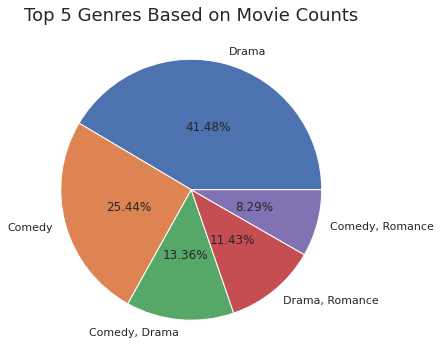

,Genre,movie_count
0,Drama,12543
1,Comedy,7693
2,"Comedy, Drama",4039
3,"Drama, Romance",3455
4,"Comedy, Romance",2508


In [7]:
df1 = pd.read_sql_query('Select Genre,movie_count from (Select Genre,Count(imdb_title_id) as movie_count from imdb_movies group by Genre) order by  movie_count desc Limit 5',conn)
fig, ax = plt.subplots(figsize = (16,6))

genres = df1['Genre']
count_movies = df1['movie_count']



ax.pie(x=count_movies, autopct="%.2f%%", labels=genres, pctdistance=0.5)
ax.set_title('Top 5 Genres Based on Movie Counts', fontsize = 18)



plt.show()
df1

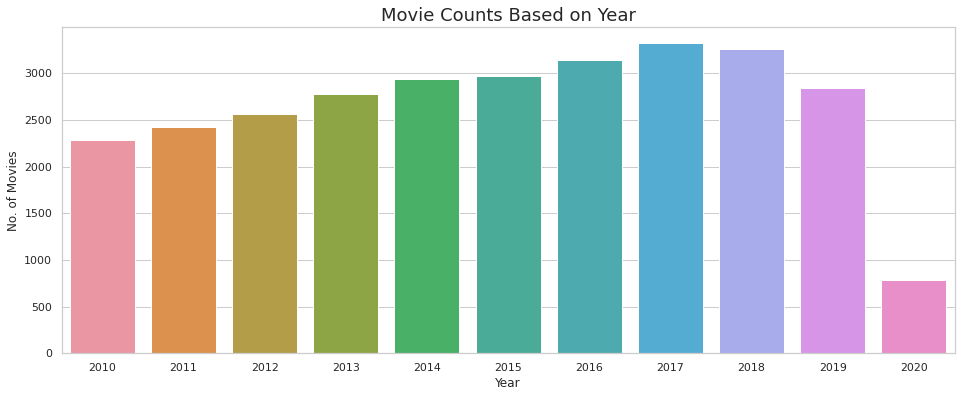

,year,movie_count
0,1894,1
1,1906,1
2,1911,5
3,1912,5
4,1913,13
...,...,...
108,2017,3329
109,2018,3257
110,2019,2841
111,2020,789


In [8]:
df2 = pd.read_sql_query('Select year,Count(imdb_title_id) as movie_count from imdb_movies group by year order by year asc',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df2['year'][101:112], y = df2['movie_count'][101:112])
ax.set_title('Movie Counts Based on Year', fontsize = 18)
ax.set_xlabel('Year')
ax.set_ylabel('No. of Movies')
plt.show()
df2

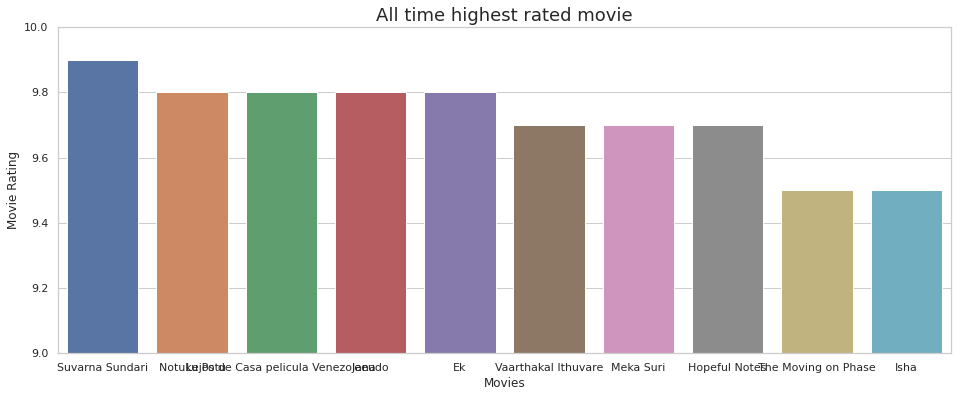

,title,weighted_average_vote
0,Suvarna Sundari,9.9
1,Notuku Potu,9.8
2,Lejos de Casa pelicula Venezolana,9.8
3,Jeeudo,9.8
4,Ek,9.8
5,Vaarthakal Ithuvare,9.7
6,Meka Suri,9.7
7,Hopeful Notes,9.7
8,The Moving on Phase,9.5
9,Isha,9.5


In [9]:
df3 = pd.read_sql_query('Select A.title,B.weighted_average_vote from imdb_movies A inner join imdb_ratings B on A.imdb_title_id = B.imdb_title_id group by A.title order by B.weighted_average_vote desc Limit 10',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df3['title'], y = df3['weighted_average_vote'])
ax.set_title('All time highest rated movie', fontsize = 18)
ax.set_xlabel('Movies')
ax.set_ylabel('Movie Rating')
ax.set_ylim(9, 10)
plt.show()
df3

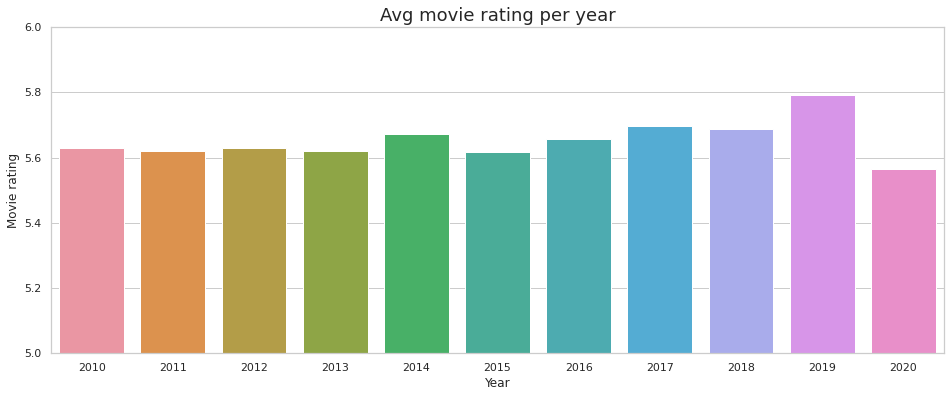

,year,year_rating
0,1894,5.900000
1,1906,6.100000
2,1911,6.140000
3,1912,5.980000
4,1913,6.546154
...,...,...
108,2017,5.696786
109,2018,5.688609
110,2019,5.791271
111,2020,5.564005


In [10]:
df4 = pd.read_sql_query('''Select A.year,AVG(B.weighted_average_vote) as year_rating from imdb_movies A inner join imdb_ratings B on A.imdb_title_id = B.imdb_title_id
group by A.year order by A.year asc 
''',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df4['year'][101:112], y = df4['year_rating'][101:112])
ax.set_title('Avg movie rating per year', fontsize = 18)
ax.set_xlabel('Year')
ax.set_ylabel('Movie rating')
ax.set_ylim(5, 6)
plt.show()
df4

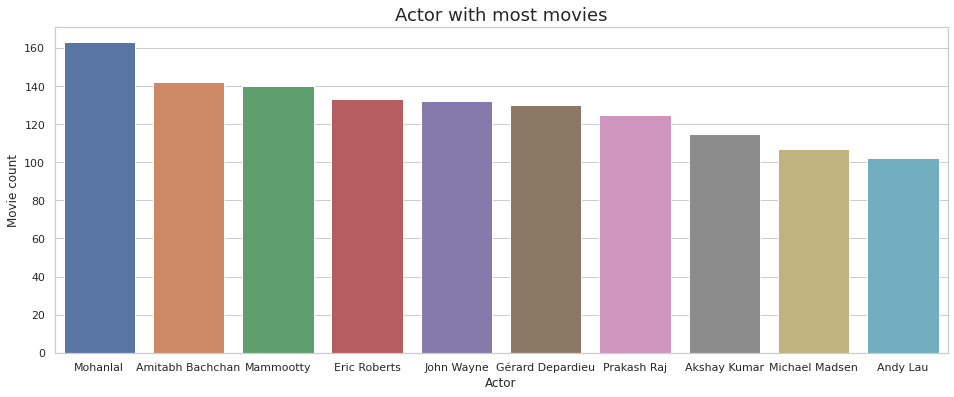

,name,movie_count
0,Mohanlal,163
1,Amitabh Bachchan,142
2,Mammootty,140
3,Eric Roberts,133
4,John Wayne,132
5,Gérard Depardieu,130
6,Prakash Raj,125
7,Akshay Kumar,115
8,Michael Madsen,107
9,Andy Lau,102


In [11]:
df5 = pd.read_sql_query('''Select B.name,A.movie_count from (Select imdb_name_id,Count(imdb_title_id) as movie_count from 
imdb_title_principals where category like '%actor%' group by  imdb_name_id ) A inner join imdb_names B 
on A.imdb_name_id = B.imdb_name_id order by  A.movie_count desc Limit 10''',conn)

fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df5['name'], y = df5['movie_count'])
ax.set_title('Actor with most movies', fontsize = 18)
ax.set_xlabel('Actor')
ax.set_ylabel('Movie count')
#ax.set_ylim(9, 10)
plt.show()
df5

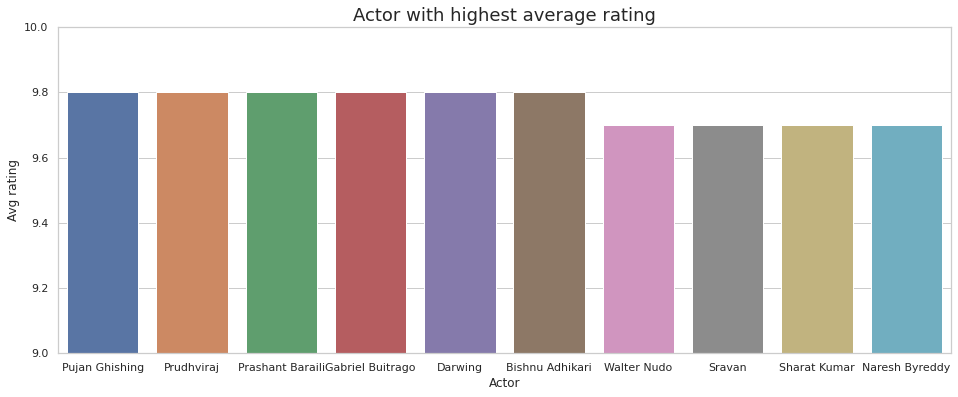

,name,weighted_average_vote
0,Pujan Ghishing,9.8
1,Prudhviraj,9.8
2,Prashant Baraili,9.8
3,Gabriel Buitrago,9.8
4,Darwing,9.8
5,Bishnu Adhikari,9.8
6,Walter Nudo,9.7
7,Sravan,9.7
8,Sharat Kumar,9.7
9,Naresh Byreddy,9.7


In [21]:
df6 = pd.read_sql_query('''Select D.name,C.weighted_average_vote from (Select A.imdb_name_id,A.imdb_title_id,B.weighted_average_vote  from imdb_title_principals A 
inner join imdb_ratings B on A.imdb_title_id = B.imdb_title_id where A.category like '%actor%' group by  imdb_name_id) C 
inner join imdb_names D on C.imdb_name_id = D.imdb_name_id group by D.name order by  C.weighted_average_vote desc Limit 10''',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df6['name'], y = df6['weighted_average_vote'])
ax.set_title('Actor with highest average rating', fontsize = 18)
ax.set_xlabel('Actor')
ax.set_ylabel('Avg rating')
ax.set_ylim(9, 10)
plt.show()
df6

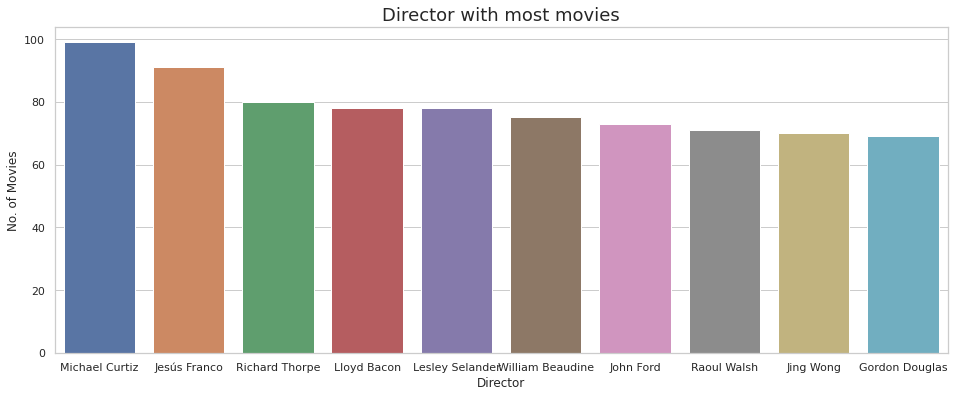

,name,movie_count
0,Michael Curtiz,99
1,Jesús Franco,91
2,Richard Thorpe,80
3,Lloyd Bacon,78
4,Lesley Selander,78
5,William Beaudine,75
6,John Ford,73
7,Raoul Walsh,71
8,Jing Wong,70
9,Gordon Douglas,69


In [13]:
df7 = pd.read_sql_query('''Select B.name,A.movie_count from (Select imdb_name_id,Count(imdb_title_id) as movie_count from 
imdb_title_principals where category like '%director%' group by  imdb_name_id ) A inner join imdb_names B 
on A.imdb_name_id = B.imdb_name_id order by  A.movie_count desc Limit 10
''',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df7['name'], y = df7['movie_count'])
ax.set_title('Director with most movies', fontsize = 18)
ax.set_xlabel('Director')
ax.set_ylabel('No. of Movies')
#ax.set_ylim(9, 10)
plt.show()
df7

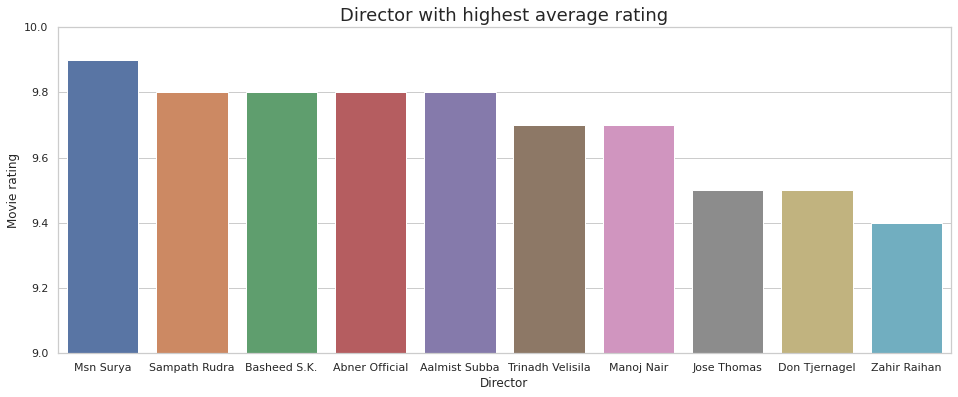

,name,weighted_average_vote
0,Msn Surya,9.9
1,Sampath Rudra,9.8
2,Basheed S.K.,9.8
3,Abner Official,9.8
4,Aalmist Subba,9.8
5,Trinadh Velisila,9.7
6,Manoj Nair,9.7
7,Jose Thomas,9.5
8,Don Tjernagel,9.5
9,Zahir Raihan,9.4


In [14]:
df8 = pd.read_sql_query('''Select D.name,C.weighted_average_vote from (Select A.imdb_name_id,A.imdb_title_id,B.weighted_average_vote  from imdb_title_principals A 
inner join imdb_ratings B on A.imdb_title_id = B.imdb_title_id where A.category like '%director%' group by  imdb_name_id) C 
inner join imdb_names D on C.imdb_name_id = D.imdb_name_id group by D.name order by  C.weighted_average_vote desc Limit 10''',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df8['name'], y = df8['weighted_average_vote'])
ax.set_title('Director with highest average rating', fontsize = 18)
ax.set_xlabel('Director')
ax.set_ylabel('Movie rating')
ax.set_ylim(9, 10)
plt.show()
df8

In [15]:
pd.read_sql_query(' select distinct title, genre, director, actors, description from imdb_movies',conn)

,title,genre,director,actors,description
0,Miss Jerry,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.
1,The Story of the Kelly Gang,"Biography, Crime, Drama",Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...
2,Den sorte drøm,Drama,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...
3,Cleopatra,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...
4,L'Inferno,"Adventure, Drama, Fantasy","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...
...,...,...,...,...,...
85850,Le lion,Comedy,Ludovic Colbeau-Justin,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...
85851,De Beentjes van Sint-Hildegard,"Comedy, Drama",Johan Nijenhuis,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...
85852,Padmavyuhathile Abhimanyu,Drama,Vineesh Aaradya,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",None
85853,Sokagin Çocuklari,"Drama, Family",Ahmet Faik Akinci,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",None


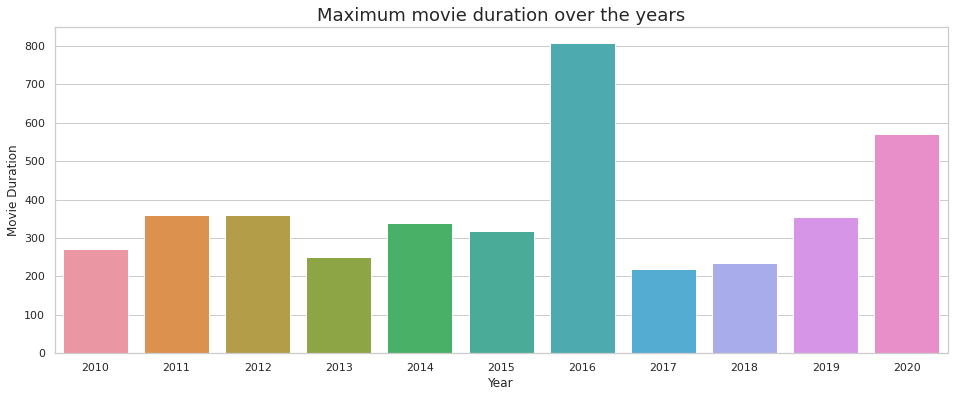

,year,Max_Movie_Duration
0,1894,45
1,1906,70
2,1911,100
3,1912,120
4,1913,124
...,...,...
108,2017,220
109,2018,234
110,2019,354
111,2020,570


In [9]:
df9 = pd.read_sql_query('SELECT year,MAX(Duration) AS Max_Movie_Duration FROM IMDB_MOVIES GROUP BY year ',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df9['year'][101:112], y = df9['Max_Movie_Duration'][101:112])
ax.set_title('Maximum movie duration over the years', fontsize = 18)
ax.set_xlabel('Year')
ax.set_ylabel('Movie Duration')
#ax.set_ylim(5, 6)
plt.show()
df9

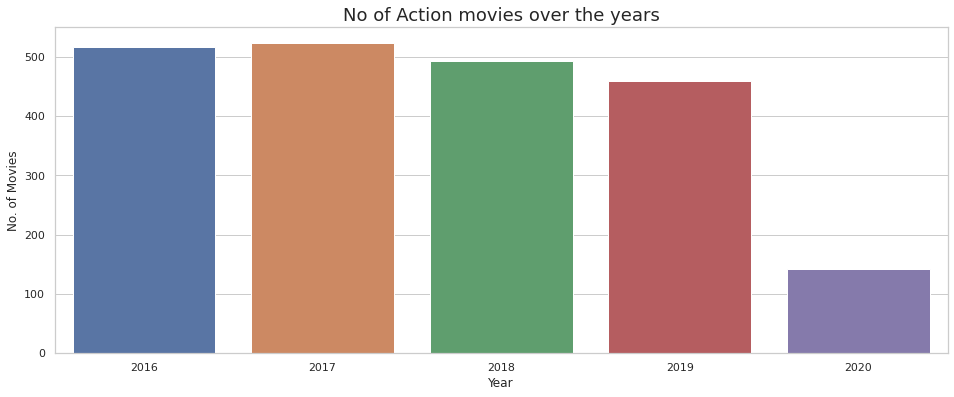

,year,movie_count
0,1914,2
1,1915,1
2,1916,8
3,1918,1
4,1919,2
...,...,...
101,2016,516
102,2017,524
103,2018,493
104,2019,460


In [13]:
df10 = pd.read_sql_query('''SELECT year, count(imdb_title_id) as movie_count FROM IMDB_MOVIES WHERE genre like '%Action%' GROUP BY YEAR ORDER BY YEAR''',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df10['year'][101:112], y = df10['movie_count'][101:112])
ax.set_title('No of Action movies over the years', fontsize = 18)
ax.set_xlabel('Year')
ax.set_ylabel('No. of Movies')
#ax.set_ylim(5, 6)
plt.show()
df10

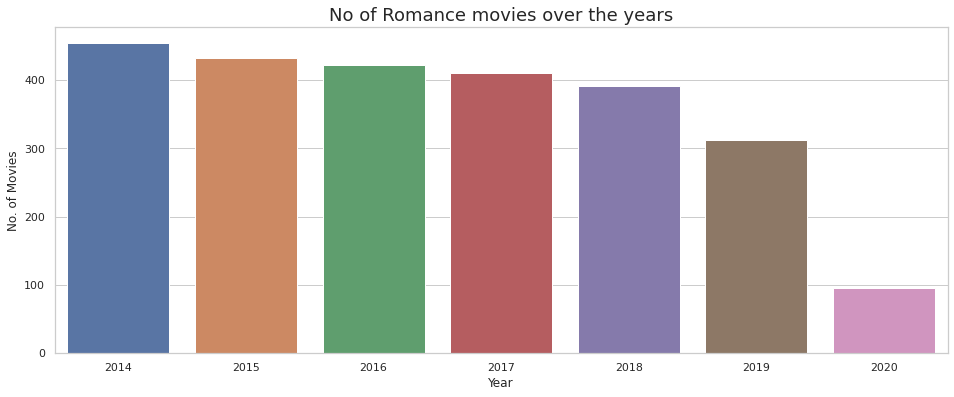

,year,movie_count
0,1894,1
1,1914,2
2,1915,1
3,1916,7
4,1917,4
...,...,...
103,2016,423
104,2017,410
105,2018,392
106,2019,312


In [18]:
df11 = pd.read_sql_query('''SELECT year, count(imdb_title_id) as movie_count FROM IMDB_MOVIES WHERE genre like '%Romance%' GROUP BY YEAR ORDER BY YEAR''',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df11['year'][101:112], y = df11['movie_count'][101:112])
ax.set_title('No of Romance movies over the years', fontsize = 18)
ax.set_xlabel('Year')
ax.set_ylabel('No. of Movies')
#ax.set_ylim(5, 6)
plt.show()
df11

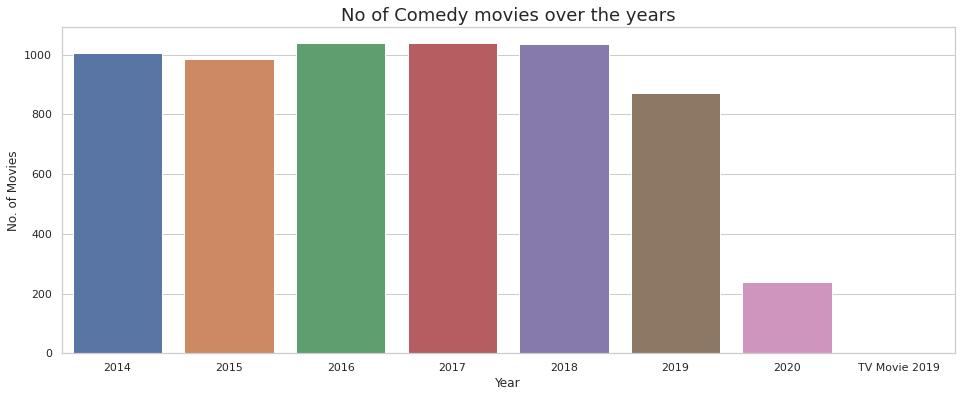

,year,movie_count
0,1913,1
1,1914,3
2,1915,1
3,1916,8
4,1917,10
...,...,...
104,2017,1040
105,2018,1035
106,2019,870
107,2020,238


In [19]:
df12 = pd.read_sql_query('''SELECT year, count(imdb_title_id) as movie_count FROM IMDB_MOVIES WHERE genre like '%Comedy%' GROUP BY YEAR ORDER BY YEAR''',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df12['year'][101:111], y = df12['movie_count'][101:111])
ax.set_title('No of Comedy movies over the years', fontsize = 18)
ax.set_xlabel('Year')
ax.set_ylabel('No. of Movies')
#ax.set_ylim(5, 6)
plt.show()
df12

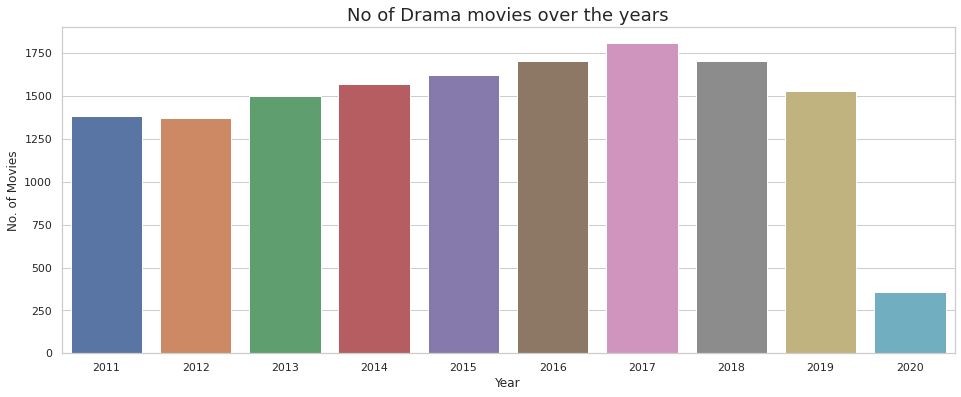

,year,movie_count
0,1906,1
1,1911,3
2,1912,4
3,1913,11
4,1914,16
...,...,...
106,2016,1707
107,2017,1812
108,2018,1708
109,2019,1530


In [20]:
df13 = pd.read_sql_query('''SELECT year, count(imdb_title_id) as movie_count FROM IMDB_MOVIES WHERE genre like '%Drama%' GROUP BY YEAR ORDER BY YEAR''',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df13['year'][101:112], y = df13['movie_count'][101:112])
ax.set_title('No of Drama movies over the years', fontsize = 18)
ax.set_xlabel('Year')
ax.set_ylabel('No. of Movies')
#ax.set_ylim(5, 6)
plt.show()
df13

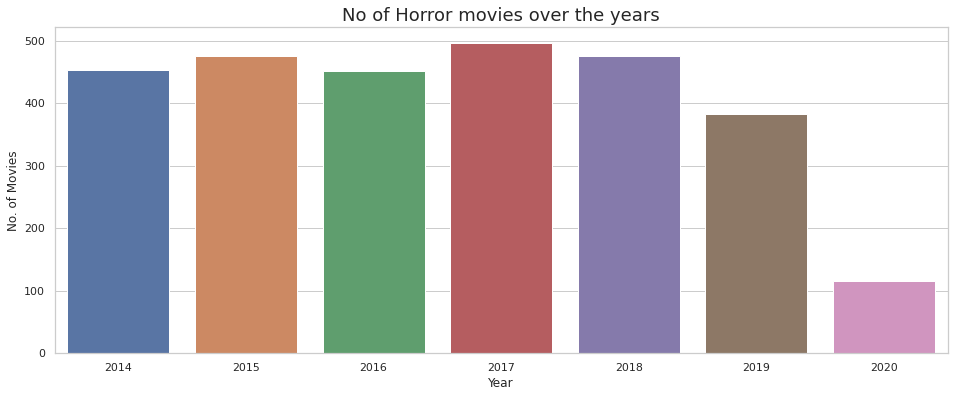

,year,movie_count
0,1913,1
1,1914,1
2,1915,1
3,1916,2
4,1917,2
...,...,...
103,2016,452
104,2017,497
105,2018,476
106,2019,383


In [21]:
df14 = pd.read_sql_query('''SELECT year, count(imdb_title_id) as movie_count FROM IMDB_MOVIES WHERE genre like '%Horror%' GROUP BY YEAR ORDER BY YEAR''',conn)
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(ax = ax, x = df14['year'][101:112], y = df14['movie_count'][101:112])
ax.set_title('No of Horror movies over the years', fontsize = 18)
ax.set_xlabel('Year')
ax.set_ylabel('No. of Movies')
#ax.set_ylim(5, 6)
plt.show()
df14

In [14]:
import plotly.express as px



In [19]:
dfg =  pd.read_sql_query('''SELECT country, count(imdb_title_id) as movie_count FROM IMDB_MOVIES GROUP BY Country ORDER BY movie_count Desc LIMIT 10''',conn)
display(dfg)
fig = px.choropleth(dfg, locations="country",
                    color="movie_count", 
                    locationmode='country names',
                    title='Countries with most movies',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

,country,movie_count
0,USA,28511
1,India,6065
2,UK,4111
3,Japan,3077
4,France,3055
5,Italy,2444
6,Canada,1802
7,Germany,1396
8,Turkey,1351
9,Hong Kong,1239


In [24]:
#pip install sklearn

In [25]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
#from currency_converter import CurrencyConverter
import datetime
#from wordcloud import WordCloud, STOPWORDS 
import textwrap
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
data_recsys = pd.read_sql_query(''' select distinct title, genre, director, actors, description from imdb_movies where country = 'USA' and year > 2010 ''',conn)
data_recsys.head()

,title,genre,director,actors,description
0,Foodfight!,"Animation, Action, Adventure",Lawrence Kasanoff,"Charlie Sheen, Hilary Duff, Eva Longoria, Wayn...",The evil Brand X joins a supermarket that beco...
1,Return to Babylon,"Biography, Comedy, Drama",Alex Monty Canawati,"Jennifer Tilly, Maria Conchita Alonso, Tippi H...",The scandals and decadent lives of the 1920's ...
2,Life's a Beach,Comedy,Tony Vitale,"Darren Geare, R.J. Knoll, Christopher Walken, ...",Darren Fields (Darren Geare) gets stood up on ...
3,'77,"Comedy, Drama",Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...","Alienated, hopeful-filmmaker Pat Johnson's epi..."
4,The Evil Within,Horror,Andrew Getty,"Sean Patrick Flanery, Dina Meyer, Frederick Ko...","The sadistic tale of a lonely, mentally handic..."


In [27]:
data_recsys.set_index('title', inplace = True)

data_recsys['genre'] = data_recsys['genre'].fillna('').astype('str').str.lower()
data_recsys['genre'] = data_recsys['genre'].str.split(',')

data_recsys['director'] = data_recsys['director'].fillna('').astype('str').str.lower()
data_recsys['director'] = data_recsys['director'].str.split(',')

data_recsys['actors'] = data_recsys['actors'].fillna('').astype('str').str.lower()
data_recsys['actors'] = data_recsys['actors'].str.split(',')

In [28]:
data_recsys['description'] = data_recsys['description'].fillna('').astype('str').str.lower()
data_recsys['description'] = data_recsys['description'].str.translate(str.maketrans('', '', string.punctuation))

from nltk.corpus import stopwords
import nltk as nltk
#nltk.download('stopwords')
listStopwords = set(stopwords.words('english'))
filtered = []
ps = PorterStemmer() 
for i, text in enumerate(data_recsys['description'].str.split()):
    for word in text:
        # Filtering/Removing stopwords in the text
        if word not in listStopwords:
            # Stemming words
            word_stemmed = ps.stem(word)
            filtered.append(word_stemmed)
    data_recsys['description'][i] = filtered
    filtered = []

In [29]:
data_recsys['bunch_of_words'] = ''
for i, text in data_recsys.iterrows():
    words = ''
    for col in data_recsys.columns:
        words = words + ' '.join(text[col]) + ' '
    data_recsys['bunch_of_words'][i] = words

In [30]:
data_recsys.head()

,genre,director,actors,description,bunch_of_words
title,,,,,
Foodfight!,"[animation, action, adventure]",[lawrence kasanoff],"[charlie sheen, hilary duff, eva longoria, ...","[evil, brand, x, join, supermarket, becom, cit...",animation action adventure lawrence kasanoff...
Return to Babylon,"[biography, comedy, drama]",[alex monty canawati],"[jennifer tilly, maria conchita alonso, tipp...","[scandal, decad, live, 1920, greatest, movi, s...",biography comedy drama alex monty canawati j...
Life's a Beach,[comedy],[tony vitale],"[darren geare, r.j. knoll, christopher walke...","[darren, field, darren, gear, get, stood, day,...",comedy tony vitale darren geare r.j. knoll c...
'77,"[comedy, drama]",[patrick read johnson],"[john francis daley, austin pendleton, colle...","[alien, hopefulfilmmak, pat, johnson, epic, st...",comedy drama patrick read johnson john franci...
The Evil Within,[horror],[andrew getty],"[sean patrick flanery, dina meyer, frederick...","[sadist, tale, lone, mental, handicap, boy, be...",horror andrew getty sean patrick flanery dina...


In [31]:
count = CountVectorizer()
count_matrix = count.fit_transform(data_recsys['bunch_of_words']).astype(np.uint8)

In [32]:
# Calculate Cosine Similarity
# Cosine similarity is a metric used to measure how similar the documents are irrespective of their size

chunk_size = 500 
matrix_len = count_matrix.shape[0] # Not sparse numpy.ndarray

# Calculate cosine similarity chunk by chunk
def similarity_cosine_by_chunk(start, end):
    if end > matrix_len:
        end = matrix_len
    return cosine_similarity(X=count_matrix[start:end], Y=count_matrix)
cosine_similarity_all = []
i=0
for chunk_start in range(0, matrix_len, chunk_size):
    
    # Initialize first cosine sim chunk (for first concatenating chunks purpose)
    if i == 0: 
        cosine_sim = similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
    
    # Initialize other cosine sim chunk, then concatenating chunk by chunk untill all chunks concatenated
    else :
        cosine_similarity_chunk= similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
        # Use type data float32 for reduce memory usage
        cosine_sim = np.concatenate((cosine_sim.astype(np.float32), cosine_similarity_chunk.astype(np.float32)))
    
    # Change value i != 0 for execute else statement, because we dont need execute if statement anymore (if statement only to initialize first chunk for first concatenating purpose)
    i= 1

In [33]:
# Create function that return 10 recommended/similar movies based on input

# Create variable index
index_movies = pd.Series(data_recsys.index)

# Movies Recommendation function
def recommendation_movies(title, cosine_sim = cosine_sim):
    recommended_movies = []
    index_movie_input = index_movies[index_movies == title].index[0]
    score_movies = pd.Series(cosine_sim[index_movie_input]).sort_values(ascending = False)
    top_10_index_movies = list(score_moviesvies.iloc[1:11].index)
    # Get movies title and year by index (top 10 movies)
    for i in top_10_index_movies:
        recommended_movies.append(df_movies['original_title'].iloc[i] + ' (' + str(df_movies['year'].iloc[i]) + ')')
    return recommended_movies

In [34]:
# Results
recommendation_movies('Avengers: Infinity War')

['Lumberjack (1944)',
 'Blondie Goes to College (1942)',
 'Shukujo wa nani o wasureta ka (1937)',
 'Judex (1916)',
 "Charlie Chan's Greatest Case (1933)",
 'Cairo (1942)',
 'Golgotha (1935)',
 '20,000 Leagues Under the Sea (1916)',
 'Soul-Fire (1925)',
 'College Holiday (1936)']

In [35]:
# Results
recommendation_movies('21 Jump Street')

['Stage Struck (1936)',
 'Die Abenteuer des Prinzen Achmed (1926)',
 'The Milkman (1950)',
 'Dangerous Money (1946)',
 'Kolberg (1945)',
 'This Is My Affair (1937)',
 'Outward Bound (1930)',
 'The Public Defender (1931)',
 'The Mystery of Mr. Wong (1939)',
 'Way Back Home (1931)']

In [36]:
# Results
recommendation_movies('Minions')

["You're in the Army Now (1941)",
 'Totò e le donne (1952)',
 'Off the Record (1939)',
 'This Is My Affair (1937)',
 'Passage West (1951)',
 'Miss Polly (1941)',
 'Sciuscià (1946)',
 'Rendez-vous de juillet (1949)',
 'The Big Stampede (1932)',
 'The Galloping Ghost (1931)']

In [37]:
# Results
recommendation_movies('Annabelle')

['Asu o tsukuru hitobito (1946)',
 'Invisible Ghost (1941)',
 'Le roman de Renard (1937)',
 'That Gang of Mine (1940)',
 "Dick Tracy's G-Men (1939)",
 'The Show-Off (1946)',
 'The Dark Eyes of London (1939)',
 "When's Your Birthday? (1937)",
 'Rocket Ship (1936)',
 'Blondie in the Dough (1947)']

In [38]:
# Results
recommendation_movies('Django Unchained')

['Week-End in Havana (1941)',
 'Angel on My Shoulder (1946)',
 'The Affairs of Annabel (1938)',
 'Young Bill Hickok (1940)',
 'Terje Vigen (1917)',
 'Romeo und Julia im Schnee (1920)',
 'Wait Till the Sun Shines, Nellie (1952)',
 'Torrid Zone (1940)',
 'Mrs. Parkington (1944)',
 'Lady Be Good (1941)']